# Chap 12 - Ex1: xclara.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
clara = pd.read_csv('Data/xclara.csv')
clara

V1         V2
0      2.072345  -3.241693
1     17.936710  15.784810
2      1.083576   7.319176
3     11.120670  14.406780
4     23.711550   2.557729
...         ...        ...
2995  85.652800  -6.461061
2996  82.770880  -2.373299
2997  64.465320 -10.501360
2998  90.722820 -12.255840
2999  64.879760 -24.877310

[3000 rows x 2 columns]

In [3]:
clara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [4]:
clara.describe()

V1           V2
count  3000.000000  3000.000000
mean     40.611358    22.862141
std      25.859054    31.759714
min     -22.495990   -38.795500
25%      18.462790    -4.003494
50%      41.552210    13.827390
75%      62.249480    55.729100
max     104.376600    87.313700

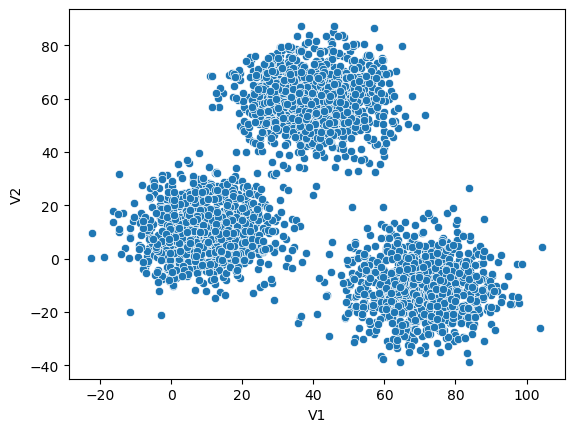

In [5]:
sbn.scatterplot(data = clara, x = 'V1', y = 'V2')
plt.show()

## <span style = 'color:yellow'> Find optimal number of clusters K 

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_nums = range(2,10)

for k in k_nums:
    hierclust = AgglomerativeClustering(n_clusters = k)
    hierclust.fit(clara)
    labels = hierclust.labels_
    print(f'Silhouette score with K = {k} ___ {silhouette_score(clara, labels)}')

print('\n=> Choose K = 3')

Silhouette score with K = 2 ___ 0.5427963605097919
Silhouette score with K = 3 ___ 0.6941949594065251
Silhouette score with K = 4 ___ 0.5332756530462549
Silhouette score with K = 5 ___ 0.40224948821799805
Silhouette score with K = 6 ___ 0.2916891815354351
Silhouette score with K = 7 ___ 0.29164688617102963
Silhouette score with K = 8 ___ 0.3052769891218096
Silhouette score with K = 9 ___ 0.30459285747015635

=> Choose K = 3


## <span style = 'color:yellow'> Build official model with K = 3

             V1         V2  Group
0      2.072345  -3.241693      2
1     17.936710  15.784810      2
2      1.083576   7.319176      2
3     11.120670  14.406780      2
4     23.711550   2.557729      2
...         ...        ...    ...
2995  85.652800  -6.461061      1
2996  82.770880  -2.373299      1
2997  64.465320 -10.501360      1
2998  90.722820 -12.255840      1
2999  64.879760 -24.877310      1

[3000 rows x 3 columns]



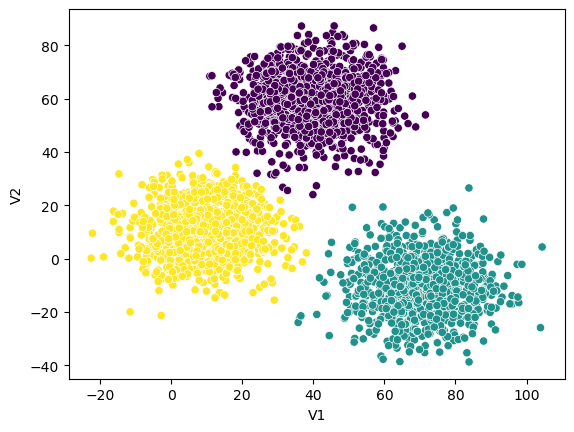

In [7]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)
hierclust.fit(clara)
labels = hierclust.labels_

clara_group = clara.copy()
clara_group['Group'] = labels
print(clara_group)

print()
sbn.scatterplot(data = clara_group, x = 'V1', y = 'V2', c = clara_group['Group'])
plt.show()

## <span style = 'color:yellow'> Plot dendogram

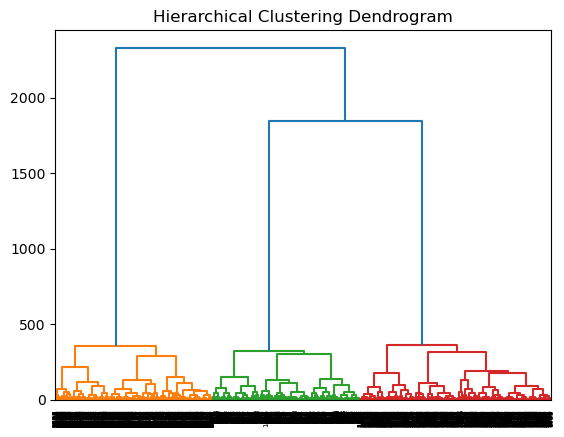

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    """
    Plots a dendrogram from an AgglomerativeClustering model.

    Args:
        model: AgglomerativeClustering model.
        **kwargs: Keyword arguments to pass to scipy.cluster.hierarchy.dendrogram.
    """
    # Create linkage matrix from the model's children.
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram.
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hierclust)

## <span style = 'color:yellow'> Plot heatmap

[[ 178.          453.            0.02311596    2.        ]
 [1137.         1414.            0.0238373     2.        ]
 [ 485.          872.            0.03190615    2.        ]
 ...
 [5988.         5993.          361.71179181 1156.        ]
 [5994.         5996.         1844.96652695 2048.        ]
 [5995.         5997.         2330.32519116 3000.        ]]


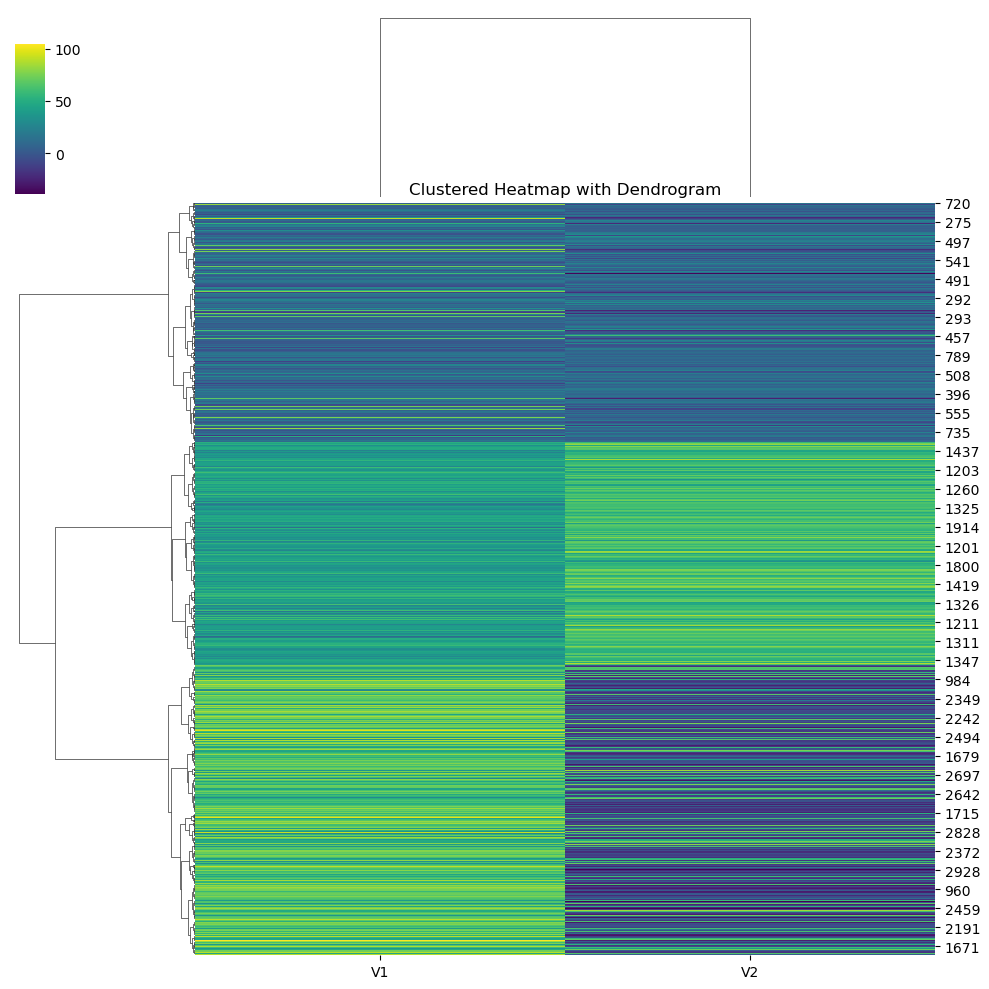

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_clustered_heatmap(data, model, title="Clustered Heatmap"):
    """
    Plots a clustered heatmap from AgglomerativeClustering outputs.

    Args:
        data: The original data (DataFrame or NumPy array).
        model: Fitted AgglomerativeClustering model.
        title: Title of the plot.
    """

    # Create linkage matrix
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Reorder the data based on clustering
    if isinstance(data, pd.DataFrame):
        ordered_indices = model.labels_
        ordered_data = data.iloc[np.argsort(ordered_indices)]
    else:
        ordered_indices = model.labels_
        ordered_data = data[np.argsort(ordered_indices)]
    print(linkage_matrix)
    # Plot the clustered heatmap
    fig = sbn.clustermap(ordered_data, row_linkage=linkage_matrix, col_cluster=True, figsize=(10, 10), cmap="viridis", cbar_pos=(0.02, 0.8, 0.03, 0.15))
    fig.ax_heatmap.set_title(title)
    plt.show()

plot_clustered_heatmap(clara, hierclust, "Clustered Heatmap with Dendrogram")

# <span style = 'color:yellow'> Report clustering results:

In [10]:
data_group = clara_group.copy()

for group in data_group['Group'].unique():
    print(f'\n=============== Cluster group {group} =========================\n')
    data = data_group[data_group['Group'] == group]
 
    print(f'n_observations: {data.shape[0]}\n')

    for col_name in data.columns[:-1]:
        print(f'{col_name}: {np.min(data[col_name])} ~ {np.median(data[col_name])} ~ {np.max(data[col_name])}')
        print()


=============== Cluster group 2 =========================

n_observations: 892

V1: -22.49599 ~ 9.282419 ~ 38.0434

V2: -21.36068 ~ 10.345355000000001 ~ 39.47855


=============== Cluster group 0 =========================

n_observations: 1156

V1: 10.8867 ~ 40.89427499999999 ~ 71.56260999999998

V2: 23.99687 ~ 60.068439999999995 ~ 87.3137


=============== Cluster group 1 =========================

n_observations: 952

V1: 35.74094 ~ 69.63596 ~ 104.3766

V2: -38.7955 ~ -9.916168 ~ 26.49733



Number of numeric fields: 2

All numeric fields: ['V1', 'V2']



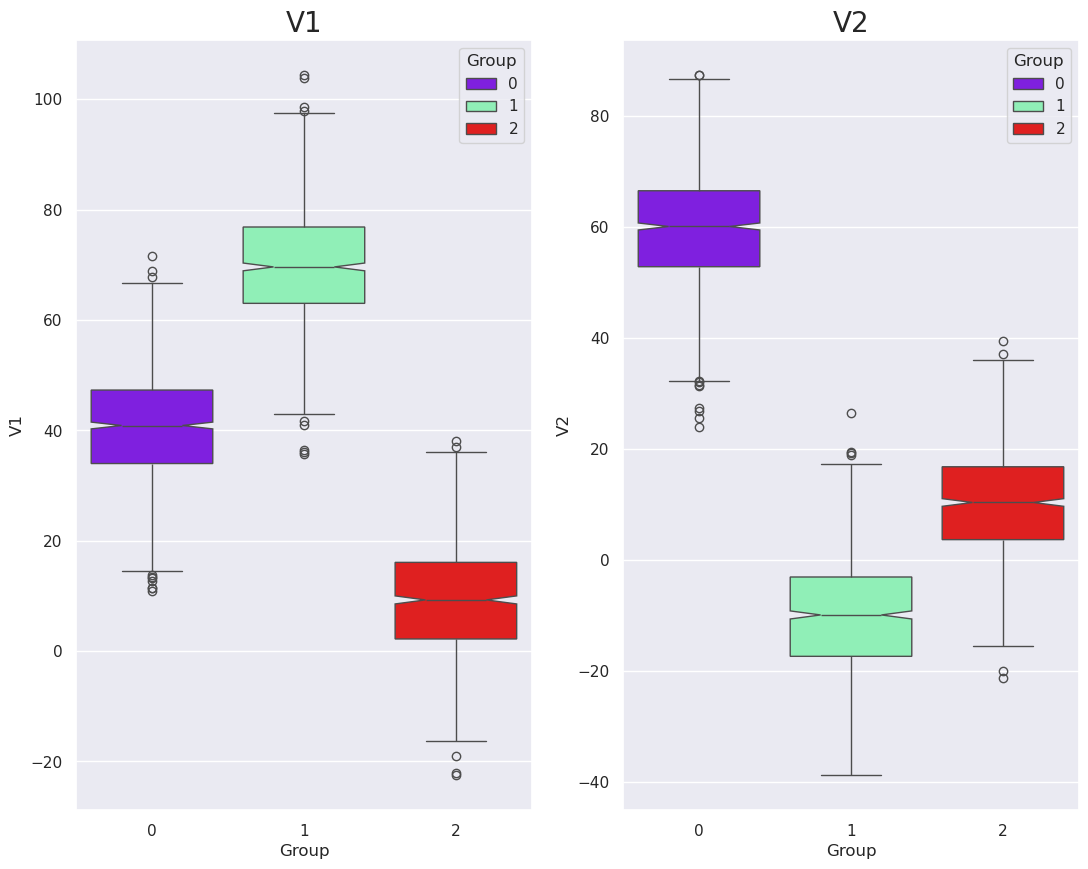

In [11]:
data_group = clara_group.copy()

numeric_cols = ['V1', 'V2']

##### Function building ##############

def boxplot_numeric(df, numeric_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(numeric_cols) % 3) == 0:
        row = len(numeric_cols) // 3
    else:
        row = (len(numeric_cols) // 3) + 1
    '''
    numeric_cols: list các tên cột biến định lượng
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of numeric fields: {len(numeric_cols)}')
    print()
    print(f'All numeric fields: {numeric_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = df, x = groups, y = numeric_cols[i-1], notch = True, hue = groups, palette = 'rainbow')
        plt.title(numeric_cols[i-1], size = 20)
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
    plt.show()

## Draw
sbn.set_theme(style ='darkgrid')
boxplot_numeric(data_group, numeric_cols, groups = data_group.iloc[:,-1])